In [ ]:
!pip install jupyterthemes
!pip install seaborn
!pip install missingno
!pip install vaderSentiment
!pip install pyLDAvis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.9 MB/s eta 0:00:00


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors
plt.style.use('ggplot')

import seaborn as sns
import missingno as msno

# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

import re
import string
import json
import glob

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download ('wordnet')

import spacy
!python -m spacy download en_core_web_md

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#vis
import pyLDAvis
import pyLDAvis.gensim

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 12.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
df = pd.read_csv('reviews_dataset.csv')
df.head()

ProductTitle  \
0  Intel Core i3 12100F 12th Gen Generation Deskt...   
1  Intel Core i3 12100F 12th Gen Generation Deskt...   
2  Intel Core i3 12100F 12th Gen Generation Deskt...   
3  Intel Core i3 12100F 12th Gen Generation Deskt...   
4  Intel Core i3 12100F 12th Gen Generation Deskt...   

                                         ReviewTitle  \
0  This is the best you'll get in this price rang...   
1                                            Awesome   
2      Best in price when even compared to i5 10400f   
3                                               Good   
4                   Used or Unboxed product received   

                                       ReviewContent       Date  Rating  \
0  If you would be building pc just for gaming an...  25-Jun-23       5   
1  This is one of the best cpu in budget if you o...  16-Nov-22       5   
2  Got this on sale for 7.26k.. Really enjoyed wi...  15-Aug-22       5   
3                                Performance is good  11-Nov-23       4   
4  Product is good but by looking at packaging an...  24-Aug-23       3   

             Author Country              Sentiment Category Generation  
0        Padi Takhu   India  competition sentiment       i3       12th  
1           shubham   India  competition sentiment       i3       12th  
2      Debasis Dhar   India               positive       i3       12th  
3  Lakhan Lal Uraon   India               positive       i3       12th  
4            Ruchit   India               positive       i3       12th

In [ ]:
print(df.shape)
df.info()

(3310, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3310 entries, 0 to 3309
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ProductTitle   3310 non-null   object
 1   ReviewTitle    3310 non-null   object
 2   ReviewContent  3310 non-null   object
 3   Date           3310 non-null   object
 4   Rating         3310 non-null   int64 
 5   Author         3310 non-null   object
 6   Country        3310 non-null   object
 7   Sentiment      3310 non-null   object
 8   Category       3310 non-null   object
 9   Generation     3310 non-null   object
dtypes: int64(1), object(9)
memory usage: 258.7+ KB


ProductTitle     0
ReviewTitle      0
ReviewContent    0
Date             0
Rating           0
Author           0
Country          0
Sentiment        0
Category         0
Generation       0
dtype: int64


<Axes: >

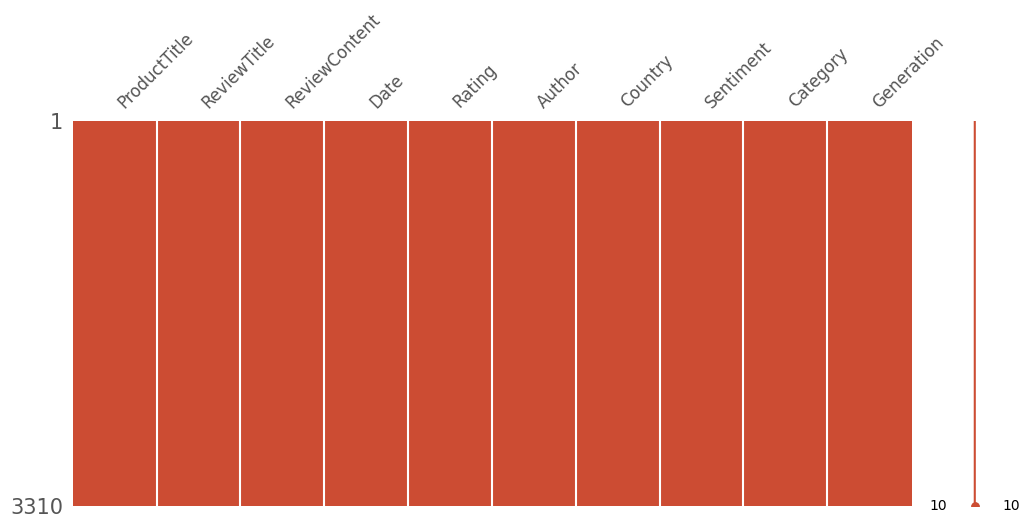

In [ ]:
print(df.isnull().sum())
msno.matrix(df,figsize=(12,5), fontsize=12, color=(0.8, 0.3, 0.2))

In [ ]:
df.ReviewTitle = df.ReviewTitle.apply(lambda x: re.sub(r"r/", "", x))
df.ReviewTitle = df.ReviewTitle.apply(lambda x: x.lower())
df.ReviewTitle.unique()

array(["this is the best you'll get in this price range thats it!",
       'awesome', 'best in price when even compared to i5 10400f', ...,
       'just okay', 'worth the money', 'fair'], dtype=object)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 143 (\x8f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 144 (\x90) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


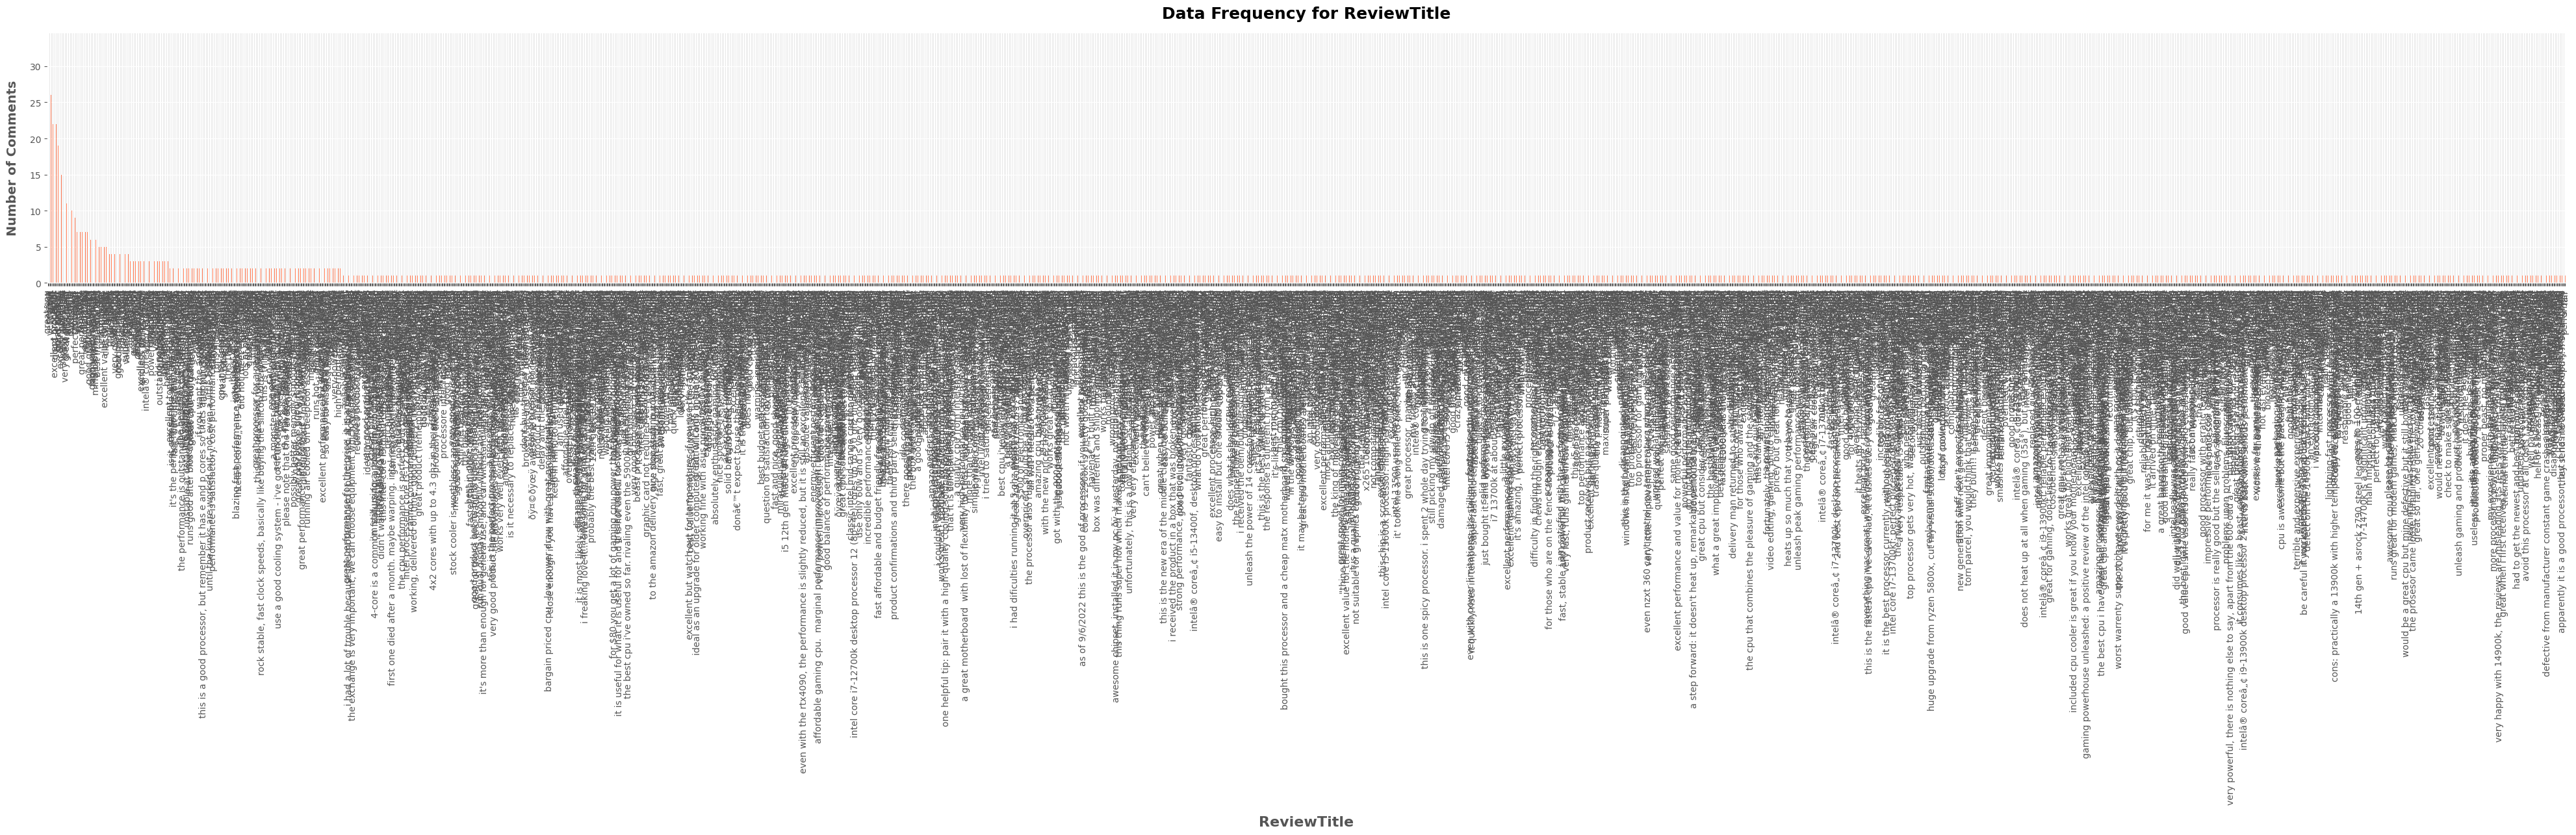

In [ ]:
df['ReviewTitle'].value_counts().sort_values(ascending = False).plot(kind='bar', figsize=(50,5), width=0.2, color="#FF7B54")

plt.xlabel("ReviewTitle", fontsize=16, fontweight="semibold", labelpad=12)
plt.ylabel("Number of Comments", fontsize=14, fontweight="semibold", labelpad=12)
plt.title("Data Frequency for ReviewTitle", fontsize=18,pad=16, fontweight="bold")

plt.show()

In [ ]:
# Adding two columns of number of words in each comment and the length of the comment.
df['word_count'] = df['ReviewTitle'].apply(lambda x : len(str(x).split(" ")))
df['length'] = df['ReviewTitle'].str.len()
df.describe()

Rating   word_count       length
count  3310.000000  3310.000000  3310.000000
mean      4.578550     3.880665    22.465257
std       1.012625     2.954672    16.426706
min       1.000000     1.000000     1.000000
25%       5.000000     2.000000    11.000000
50%       5.000000     3.000000    18.000000
75%       5.000000     5.000000    29.000000
max       5.000000    22.000000   116.000000

In [ ]:
# Droping the rows with word length smaller than 8

drop_index = df[df["word_count"] < 8 ].index
df.drop(drop_index, inplace= True)
df.shape

(352, 12)

In [ ]:
# Text Comment CLeaning
# defining some characters, stopwords that need to be removed

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
TAG_RE = re.compile(r'<[^>]+>')


# this function will just check wheather the argument is a number or not
def isDigit(x):
    try:
        float(x)
        return True
    except ValueError:
        return False

# A funtion to clean the text comments
def clean_text(sentence, stem=False):

    sentence = str(sentence)
    #Remove integers
    sentence = "".join([i for i in sentence if isDigit(i)==False])

    # Make all the text lower
    sentence = sentence.lower()

    # Remove html tags
    sentence = TAG_RE.sub('', sentence)

    # Remove speacial characters
    sentence = re.sub(text_cleaning_re, ' ',sentence)

    # Remove Punctuations
    sentence = sentence.translate(str.maketrans("", "", string.punctuation))

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    # Remove stopwords and Stemming
    items = []
    for item in sentence.split():
        if item not in stop_words:
            if stem:
                items.append(stemmer.stem(item))
            else:
                items.append(item)

    sentence = " ".join(items)

    return sentence



# Replacing the text comment with cleaned one by passing them one by one to the clean text function
df.ReviewTitle = df.ReviewTitle.apply(lambda x: clean_text(x))
df.head()

ProductTitle  \
0   Intel Core i3 12100F 12th Gen Generation Deskt...   
2   Intel Core i3 12100F 12th Gen Generation Deskt...   
7   Intel Core i3 12100F 12th Gen Generation Deskt...   
11  Intel Core i3 12100F 12th Gen Generation Deskt...   
15  Intel Core i3 12100F 12th Gen Generation Deskt...   

                         ReviewTitle  \
0         best get price range thats   
2         best price even compared f   
7        best gaming cpu price range   
11  faster older core processors lga   
15       still best value budget cpu   

                                        ReviewContent       Date  Rating  \
0   If you would be building pc just for gaming an...  25-Jun-23       5   
2   Got this on sale for 7.26k.. Really enjoyed wi...  15-Aug-22       5   
7   ðŸ“‹ â­Product Descriptionâ­: the IntelÂ® i3...  06-Oct-22       5   
11  Incredible speed and also saves energy when us...  23-Nov-23       5   
15  Works great out of the box, stock cooler is mu...  02-Feb-23       5   

          Author    Country              Sentiment Category Generation  \
0     Padi Takhu      India  competition sentiment       i3       12th   
2   Debasis Dhar      India               positive       i3       12th   
7       Doraemon      Italy  competition sentiment       i3       12th   
11           st5    Germany  competition sentiment       i3       12th   
15       J Marsh  Australia               positive       i3       12th   

    word_count  length  
0           12      57  
2            9      45  
7            8      39  
11           9      52  
15           8      39

In [ ]:
# Generating TF-IDF Vector for KMeans from the comment_body
vectorizer = TfidfVectorizer(
                                lowercase=True,
                                ngram_range = (1,3),
                                stop_words = "english"

                            )

vectors = vectorizer.fit_transform(df.ReviewTitle)

Text(0.5, 1.0, 'Elbow plot')

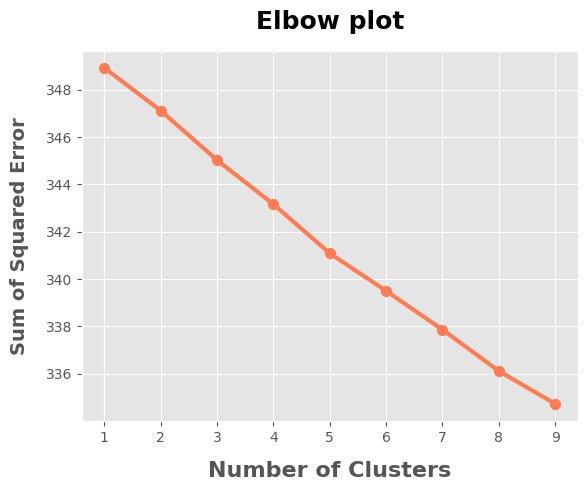

In [ ]:
k_range = range(1,10)
sse = []

for k in k_range:
    model = KMeans(n_clusters= k, init="k-means++", random_state=38, max_iter=100, n_init=1) #43, 45
    model.fit(vectors)
    sse.append(model.inertia_)

## Ploting SSE vs Number of Clusters and found the optimum number of clusters


plt.plot(k_range, sse, color="#FF7B54", marker = '.', markersize=14, linewidth = 3)
plt.xlabel("Number of Clusters", fontsize=16, fontweight="semibold", labelpad=12)
plt.ylabel("Sum of Squared Error", fontsize=14, fontweight="semibold", labelpad=12)
plt.title("Elbow plot", fontsize=18,pad=16, fontweight="bold")

In [ ]:
# Labeling the rows of the dataframe with cluster labels
true_k = 4
model = KMeans(n_clusters=true_k, init="k-means++", random_state=48, max_iter=2000, n_init=1)
y_predicted = model.fit_predict(vectors)
df["cluster"] = y_predicted
df['cluster'].value_counts()

cluster
0    265
1     48
2     20
3     19
Name: count, dtype: int64

In [ ]:
## Printing the Hotwords of every clusters

print("Cluster Hotwords")
hotwords = model.cluster_centers_.argsort()[:, ::-1]
feature_names = vectorizer.get_feature_names_out()

for i in range(true_k):
    print(f"Cluster {i}")
    for j in hotwords[i, :20]:
        print(f"{feature_names[j]}")
    print("-------------------------")

Cluster Hotwords
Cluster 0
good
processor
intel
best
price
great
performance
core
gaming
box
th
intel core
buy
value
product
years
cores
gen
pc
works
-------------------------
Cluster 1
cpu
great
really
great cpu
gaming
good cpu
good
intel
fast
time
powerful
cpu market
market
line cpu
th gen
really fast
powerful cpu
core
gen
nest cpu market
-------------------------
Cluster 2
use
fine
got
good
got use
fine got
fine got use
use good
office
cooling
package
home
good cooling
got aio
got aio diamond
aio diamond
aio diamond paste
diamond
diamond paste
cooling got
-------------------------
Cluster 3
power
know
power cores
cpu
cores
core power
good
cpu power
great cards power
cards power
cards
great cards
reasonable price
reasonable
power reasonable price
power reasonable
generation
performance
great
power know
-------------------------


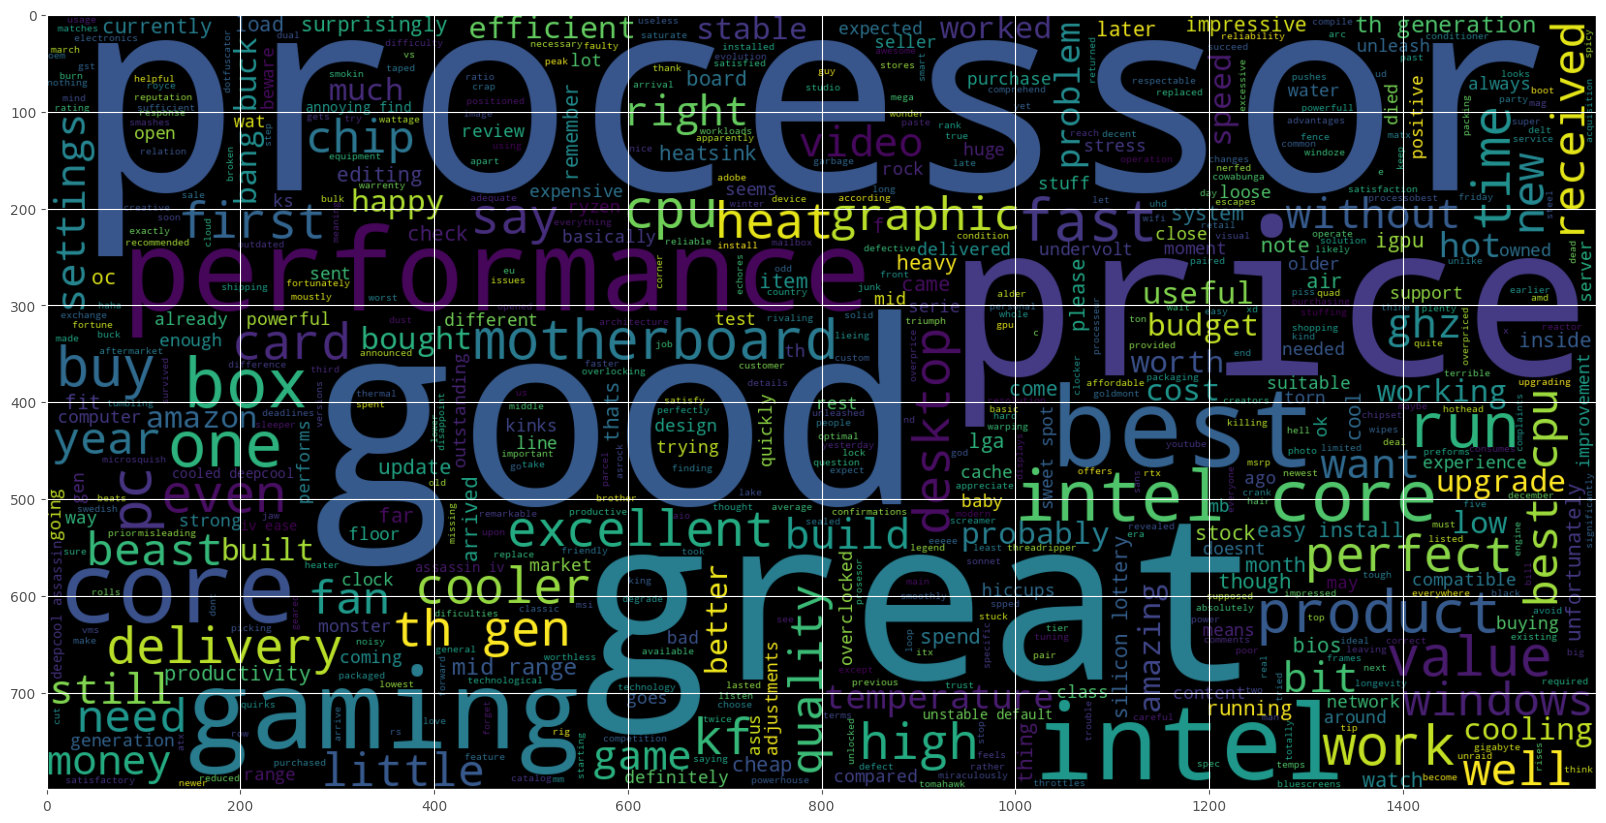

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.cluster == 0 ].ReviewTitle))
plt.imshow(wc , interpolation = 'bilinear')

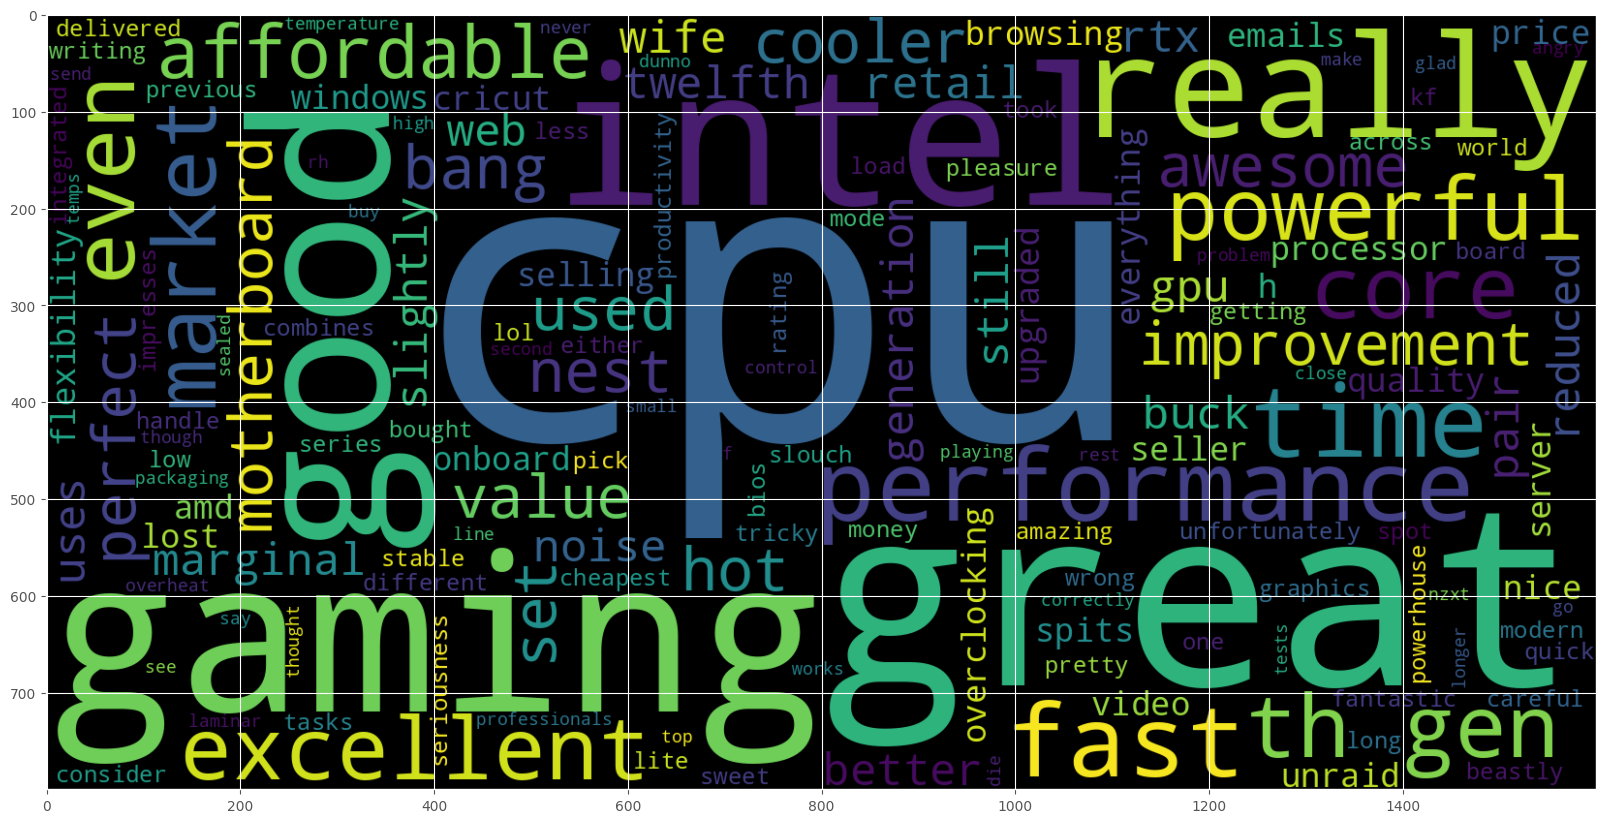

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.cluster == 1 ].ReviewTitle))
plt.imshow(wc , interpolation = 'bilinear')

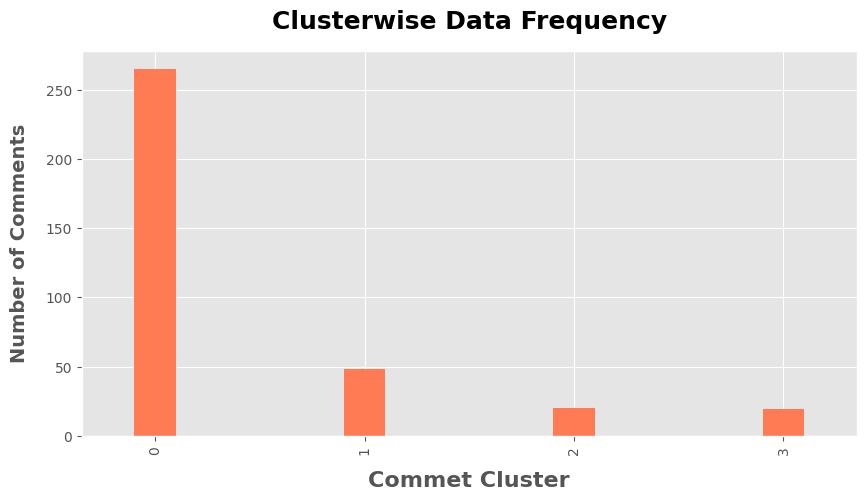

In [ ]:
df['cluster'].value_counts().sort_values(ascending = False).plot(kind='bar', figsize=(10,5), width=0.2, color="#FF7B54")

plt.xlabel("Comment Cluster", fontsize=16, fontweight="semibold", labelpad=12)
plt.ylabel("Number of Comments", fontsize=14, fontweight="semibold", labelpad=12)
plt.title("Clusterwise Data Frequency", fontsize=18,pad=16, fontweight="bold" )

plt.show()

In [ ]:
# Creating list of Frequent words from comment text
freq = pd.Series(' '.join(df['ReviewTitle']).split()).value_counts()[:15]

# Removing Frequent words from comment text
df['comment_body'] = df['ReviewTitle'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [ ]:
# all_word_series
all_word_series = pd.Series(' '.join(df['ReviewTitle']).split()).value_counts()[-20000:]

# Creating list of words which has appeared less then 4 times in the entire corpus
rare = []
for i in range(0,792,1):
    if all_word_series.values[i] < 4:
        rare.append(all_word_series.index[i])

# Removing Rare words from comment text
df['ReviewTitle'] = df['ReviewTitle'].apply(lambda x: " ".join(x for x in x.split() if x not in rare))

In [ ]:
# Creating nlp object
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

In [ ]:
def lemmatization(texts,allowed_postags=['NOUN', 'ADJ','VERB', 'ADV']):
       output = []
       for sent in texts:
             doc = nlp(sent)
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [ ]:
# lemmatization of the reviewTitle
text_list=df['ReviewTitle'].tolist()
print(text_list[1])
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1])

best price even f
['good', 'price', 'even']


In [ ]:
# Creating bigrams and tigrams for LDA

bigram_phrases = gensim.models.Phrases(tokenized_reviews, min_count=5, threshold=100)
trigram_phrases = gensim.models.Phrases(bigram_phrases[tokenized_reviews], threshold=100)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return ([trigram[bigram[doc]] for doc in texts])

data_bigrams = make_bigrams(tokenized_reviews)
data_bigrams_trigrams = make_trigrams(data_bigrams)

In [ ]:
# Removing frequent words from bigrams and tigrams and generating TF-IDF model
from gensim.models import TfidfModel

id2word = corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus = [id2word.doc2bow(text) for text in texts]

tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.03
words  = []
words_missing_in_tfidf = []
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words+words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, random_state= 1)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
## Generating LDA model and calculating Coherence score for them.

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=tokenized_reviews, start=1, limit=10, step=1)

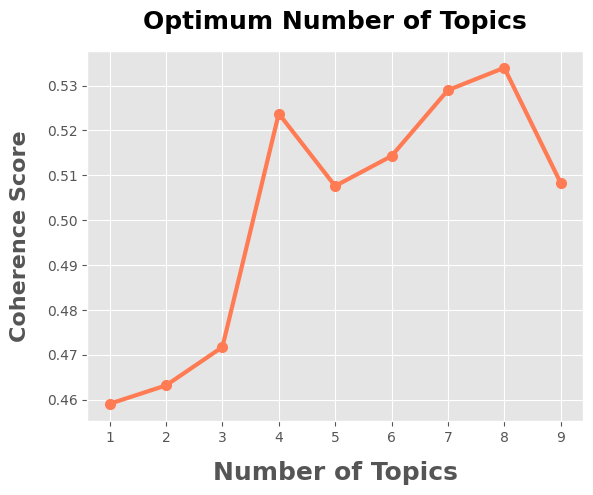

In [ ]:
# Plotting the Coherence socre for different number of topics to find out the optimum number of topics

limit=10; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values, color="#FF7B54", marker = '.', markersize=14, linewidth = 3)
plt.title("Optimum Number of Topics", fontsize=18, fontweight="bold", pad=16)
plt.xlabel("Number of Topics", fontsize=18, fontweight="semibold", labelpad=12)
plt.ylabel("Coherence Score", fontsize=16, fontweight="semibold", labelpad=12)
plt.show()

In [ ]:
# Printing the coherence scores

for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.4591
Num Topics = 2  has Coherence Value of 0.4632
Num Topics = 3  has Coherence Value of 0.4717
Num Topics = 4  has Coherence Value of 0.5238
Num Topics = 5  has Coherence Value of 0.5076
Num Topics = 6  has Coherence Value of 0.5143
Num Topics = 7  has Coherence Value of 0.529
Num Topics = 8  has Coherence Value of 0.534
Num Topics = 9  has Coherence Value of 0.5083


In [ ]:
# Select the model and print the topics
optimal_model = model_list[4]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.102*"cpu" + 0.044*"even" + 0.043*"cool" + 0.043*"performance" + 0.039*"good" + 0.038*"get" + 0.038*"motherboard" + 0.028*"work" + 0.027*"perfect" + 0.022*"high"'),
 (1,
  '0.107*"processor" + 0.101*"good" + 0.061*"gaming" + 0.044*"great" + 0.034*"cpu" + 0.034*"core" + 0.024*"mid" + 0.022*"use" + 0.020*"power" + 0.020*"get"'),
 (2,
  '0.100*"good" + 0.086*"core" + 0.056*"cpu" + 0.039*"fast" + 0.039*"buy" + 0.035*"price" + 0.035*"processor" + 0.035*"intel" + 0.030*"really" + 0.026*"time"'),
 (3,
  '0.088*"cpu" + 0.076*"great" + 0.065*"good" + 0.054*"gaming" + 0.042*"performance" + 0.038*"work" + 0.035*"price" + 0.031*"value" + 0.031*"well" + 0.023*"delivery"'),
 (4,
  '0.054*"power" + 0.046*"beast" + 0.039*"great" + 0.039*"get" + 0.039*"hot" + 0.039*"run" + 0.032*"quality" + 0.024*"price" + 0.024*"performance" + 0.024*"card"')]

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.081860 -0.042114       1        1  24.480818
2     -0.060692  0.090465       2        1  21.209054
1     -0.015984 -0.103264       3        1  20.658888
0      0.027759  0.065902       4        1  19.895465
4      0.130777 -0.010988       5        1  13.755776, topic_info=         Term       Freq      Total Category  logprob  loglift
9   processor  35.000000  35.000000  Default  30.0000  30.0000
7      gaming  27.000000  27.000000  Default  29.0000  29.0000
97      beast   6.000000   6.000000  Default  28.0000  28.0000
8        core  30.000000  30.000000  Default  27.0000  27.0000
4        even  12.000000  12.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
6         cpu   1.235984  57.849696   Topic5  -4.6407  -1.8623
44        buy   1.186384  15.075529   Topic5  -4.6816  -0.5585
26       cool   1.179221  11.577793   Topic5  -4.6877  -0.3005
7      gaming   1.187763  27.376955   Topic5  -4.6805  -1.1539
3        well   1.175149  13.492836   Topic5  -4.6912  -0.4571

[231 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
37        1  0.155077  amazing
37        3  0.465230  amazing
37        4  0.310154  amazing
75        1  0.852939   amazon
45        1  0.461814  awesome
...     ...       ...      ...
79        4  0.432120    worth
73        1  0.222692     year
73        2  0.222692     year
73        3  0.222692     year
73        5  0.222692     year

[300 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1, 5])

In [ ]:
# Obtaining the main topic for each review:

lda_corpus = optimal_model[corpus]

all_topics = optimal_model.get_document_topics(corpus)
all_topics
num_docs = len(all_topics)
num_docs
all_topics_csr = gensim.matutils.corpus2csc(all_topics)
all_topics_csr
all_topics_numpy= all_topics_csr.T.toarray()
all_topics_numpy
major_topic= [np.argmax(arr) for arr in all_topics_numpy]
df['major_topic']= major_topic
df.head()

ProductTitle  \
0   Intel Core i3 12100F 12th Gen Generation Deskt...   
2   Intel Core i3 12100F 12th Gen Generation Deskt...   
7   Intel Core i3 12100F 12th Gen Generation Deskt...   
11  Intel Core i3 12100F 12th Gen Generation Deskt...   
15  Intel Core i3 12100F 12th Gen Generation Deskt...   

                    ReviewTitle  \
0          best get price range   
2             best price even f   
7   best gaming cpu price range   
11              core processors   
15  still best value budget cpu   

                                        ReviewContent       Date  Rating  \
0   If you would be building pc just for gaming an...  25-Jun-23       5   
2   Got this on sale for 7.26k.. Really enjoyed wi...  15-Aug-22       5   
7   ðŸ“‹ â­Product Descriptionâ­: the IntelÂ® i3...  06-Oct-22       5   
11  Incredible speed and also saves energy when us...  23-Nov-23       5   
15  Works great out of the box, stock cooler is mu...  02-Feb-23       5   

          Author    Country              Sentiment Category Generation  \
0     Padi Takhu      India  competition sentiment       i3       12th   
2   Debasis Dhar      India               positive       i3       12th   
7       Doraemon      Italy  competition sentiment       i3       12th   
11           st5    Germany  competition sentiment       i3       12th   
15       J Marsh  Australia               positive       i3       12th   

    word_count  length  cluster                 comment_body  major_topic  
0           12      57        0              get range thats            1  
2            9      45        0              even compared f            2  
7            8      39        0                        range            3  
11           9      52        0  faster older processors lga            1  
15           8      39        0           still value budget            3

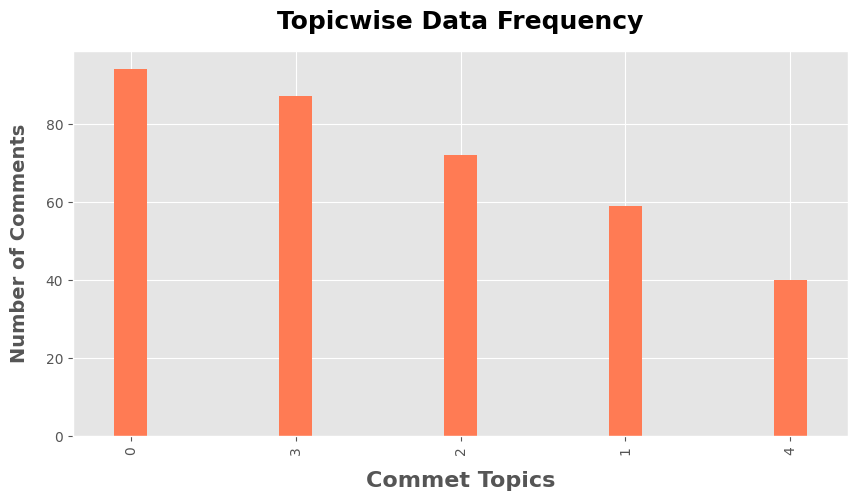

In [ ]:
# Plotting Data frequency for topics

df['major_topic'].value_counts().sort_values(ascending = False).plot(kind='bar',figsize=(10,5), width=0.2, color="#FF7B54")

plt.xlabel("Commet Topics", fontsize=16, fontweight="semibold", labelpad=12)
plt.ylabel("Number of Comments", fontsize=14, fontweight="semibold", labelpad=12)
plt.title("Topicwise Data Frequency", fontsize=18,pad=16, fontweight="bold" )

plt.show()

In [ ]:
import plotly.express as px
import plotly.figure_factory as ff

In [ ]:
import plotly.express as px
import plotly.figure_factory as ff

In [ ]:
# color_map1 = matplotlib.colors.ListedColormap(["#EE6302", "#57B75A", "#BD323F", "#DDAC71", "#452547", "#D6E715"])
# ax = piv.plot(xticks=piv.index, ylabel="Number of comments", figsize=(15,10), fontsize=18, colormap=color_map1, marker = '.', markersize=20, linewidth = 3)

# ax.set_title("Topic Distribution in the CLusters", fontsize=22, pad=22, fontweight="bold")
# ax.set_xlabel("Comment Clusters", fontsize=20, fontweight="semibold", labelpad=20)
# ax.set_ylabel("Number of comments", fontsize=20, fontweight="semibold", labelpad=20)

# leg = plt.legend()
# for line in leg.get_lines():
#     line.set_linewidth(4)
# for text in leg.get_texts():
#     text.set_fontsize(20)

# plt.show()

NameError: name 'piv' is not defined

In [ ]:
## Creating Vader object for Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

analyser = SentimentIntensityAnalyzer()

In [ ]:
# Calculating Polarity and adding the scores inside the existing dataframe
result = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['ReviewTitle']
    id = row['Author']
    result[id] = analyser.polarity_scores(text)

# Convert result dictionary into dataframe
df_sentiment = pd.DataFrame(result).T

# Merge result with the input dataframe
df_sentiment = df_sentiment.reset_index().rename(columns={'index':'Author'})
df_sentiment = df.merge(df_sentiment, how='left')
df_sentiment.head()

  0%|          | 0/352 [00:00<?, ?it/s]

ProductTitle  \
0  Intel Core i3 12100F 12th Gen Generation Deskt...   
1  Intel Core i3 12100F 12th Gen Generation Deskt...   
2  Intel Core i3 12100F 12th Gen Generation Deskt...   
3  Intel Core i3 12100F 12th Gen Generation Deskt...   
4  Intel Core i3 12100F 12th Gen Generation Deskt...   

                   ReviewTitle  \
0         best get price range   
1            best price even f   
2  best gaming cpu price range   
3              core processors   
4  still best value budget cpu   

                                       ReviewContent       Date  Rating  \
0  If you would be building pc just for gaming an...  25-Jun-23       5   
1  Got this on sale for 7.26k.. Really enjoyed wi...  15-Aug-22       5   
2  ðŸ“‹ â­Product Descriptionâ­: the IntelÂ® i3...  06-Oct-22       5   
3  Incredible speed and also saves energy when us...  23-Nov-23       5   
4  Works great out of the box, stock cooler is mu...  02-Feb-23       5   

         Author    Country              Sentiment Category Generation  \
0    Padi Takhu      India  competition sentiment       i3       12th   
1  Debasis Dhar      India               positive       i3       12th   
2      Doraemon      Italy  competition sentiment       i3       12th   
3           st5    Germany  competition sentiment       i3       12th   
4       J Marsh  Australia               positive       i3       12th   

   word_count  length  cluster                 comment_body  major_topic  neg  \
0          12      57        0              get range thats            1  0.0   
1           9      45        0              even compared f            2  0.0   
2           8      39        0                        range            3  0.0   
3           9      52        0  faster older processors lga            1  0.0   
4           8      39        0           still value budget            3  0.0   

     neu    pos  compound  
0  0.417  0.583    0.6369  
1  0.417  0.583    0.6369  
2  0.488  0.512    0.6369  
3  1.000  0.000    0.0000  
4  0.312  0.688    0.7650

In [ ]:
# Function to label the sentiment according to score
def get_tag(val):
    if val <= -0.50:
        return 'Negative'
    elif val > -0.5 and val < 0:
        return 'Somewhat Negative'
    elif val < 0.5 and val > 0:
        return 'Somewhat Positive'
    elif val >= 0.5:
        return 'Positive'
    else:
        return 'Neutral'

In [ ]:
# Adding Sentiment Labels to dataframe

df_sentiment['Sentiment'] = df_sentiment['compound'].apply(get_tag)
df_sentiment.head()

ProductTitle  \
0  Intel Core i3 12100F 12th Gen Generation Deskt...   
1  Intel Core i3 12100F 12th Gen Generation Deskt...   
2  Intel Core i3 12100F 12th Gen Generation Deskt...   
3  Intel Core i3 12100F 12th Gen Generation Deskt...   
4  Intel Core i3 12100F 12th Gen Generation Deskt...   

                   ReviewTitle  \
0         best get price range   
1            best price even f   
2  best gaming cpu price range   
3              core processors   
4  still best value budget cpu   

                                       ReviewContent       Date  Rating  \
0  If you would be building pc just for gaming an...  25-Jun-23       5   
1  Got this on sale for 7.26k.. Really enjoyed wi...  15-Aug-22       5   
2  ðŸ“‹ â­Product Descriptionâ­: the IntelÂ® i3...  06-Oct-22       5   
3  Incredible speed and also saves energy when us...  23-Nov-23       5   
4  Works great out of the box, stock cooler is mu...  02-Feb-23       5   

         Author    Country Sentiment Category Generation  word_count  length  \
0    Padi Takhu      India  Positive       i3       12th          12      57   
1  Debasis Dhar      India  Positive       i3       12th           9      45   
2      Doraemon      Italy  Positive       i3       12th           8      39   
3           st5    Germany   Neutral       i3       12th           9      52   
4       J Marsh  Australia  Positive       i3       12th           8      39   

   cluster                 comment_body  major_topic  neg    neu    pos  \
0        0              get range thats            1  0.0  0.417  0.583   
1        0              even compared f            2  0.0  0.417  0.583   
2        0                        range            3  0.0  0.488  0.512   
3        0  faster older processors lga            1  0.0  1.000  0.000   
4        0           still value budget            3  0.0  0.312  0.688   

   compound  
0    0.6369  
1    0.6369  
2    0.6369  
3    0.0000  
4    0.7650

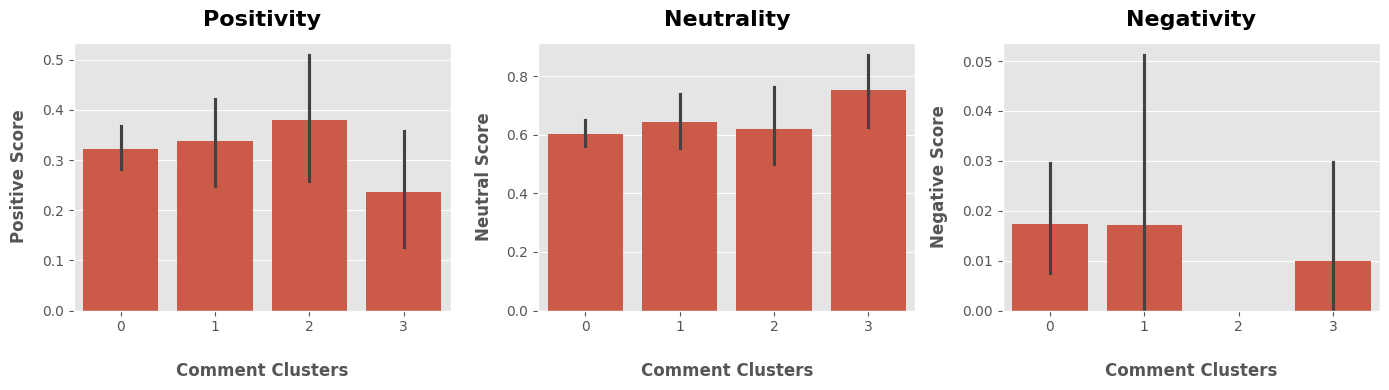

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4))

sns.barplot(data=df_sentiment, x='cluster', y='pos', ax=axs[0])
sns.barplot(data=df_sentiment, x='cluster', y='neu', ax=axs[1])
sns.barplot(data=df_sentiment, x='cluster', y='neg', ax=axs[2])

axs[0].set_title('Positivity', fontsize=16, pad=12, fontweight="bold" )
axs[1].set_title('Neutrality' ,fontsize=16, pad=12, fontweight="bold" )
axs[2].set_title('Negativity', fontsize=16, pad=12, fontweight="bold" )

axs[0].set_xlabel("Comment Clusters", fontsize=12, fontweight="semibold", labelpad=20)
axs[1].set_xlabel("Comment Clusters", fontsize=12, fontweight="semibold", labelpad=20)
axs[2].set_xlabel("Comment Clusters", fontsize=12, fontweight="semibold", labelpad=20)

axs[0].set_ylabel("Positive Score", fontsize=12, fontweight="semibold", labelpad=10)
axs[1].set_ylabel("Neutral Score", fontsize=12, fontweight="semibold", labelpad=10)
axs[2].set_ylabel("Negative Score", fontsize=12, fontweight="semibold", labelpad=10)

plt.tight_layout()
plt.show()

In [ ]:
vis_dfS2 = pd.pivot_table(df_sentiment, index= "major_topic", columns = "Sentiment", aggfunc ="count")
vis_dfS2

Author                                                       \
Sentiment   Negative Neutral Positive Somewhat Negative Somewhat Positive   
major_topic                                                                 
0                1.0    58.0     19.0               1.0              15.0   
1                NaN    25.0     18.0               NaN              16.0   
2                NaN    32.0     20.0               NaN              20.0   
3                1.0    27.0     42.0               2.0              15.0   
4                NaN    25.0      6.0               1.0               8.0   

            Category                                                       \
Sentiment   Negative Neutral Positive Somewhat Negative Somewhat Positive   
major_topic                                                                 
0                1.0    58.0     19.0               1.0              15.0   
1                NaN    25.0     18.0               NaN              16.0   
2                NaN    32.0     20.0               NaN              20.0   
3                1.0    27.0     42.0               2.0              15.0   
4                NaN    25.0      6.0               1.0               8.0   

             ...      pos                                     \
Sentiment    ... Negative Neutral Positive Somewhat Negative   
major_topic  ...                                               
0            ...      1.0    58.0     19.0               1.0   
1            ...      NaN    25.0     18.0               NaN   
2            ...      NaN    32.0     20.0               NaN   
3            ...      1.0    27.0     42.0               2.0   
4            ...      NaN    25.0      6.0               1.0   

                              word_count                                     \
Sentiment   Somewhat Positive   Negative Neutral Positive Somewhat Negative   
major_topic                                                                   
0                        15.0        1.0    58.0     19.0               1.0   
1                        16.0        NaN    25.0     18.0               NaN   
2                        20.0        NaN    32.0     20.0               NaN   
3                        15.0        1.0    27.0     42.0               2.0   
4                         8.0        NaN    25.0      6.0               1.0   

                               
Sentiment   Somewhat Positive  
major_topic                    
0                        15.0  
1                        16.0  
2                        20.0  
3                        15.0  
4                         8.0  

[5 rows x 85 columns]

KeyError: 'Negative'

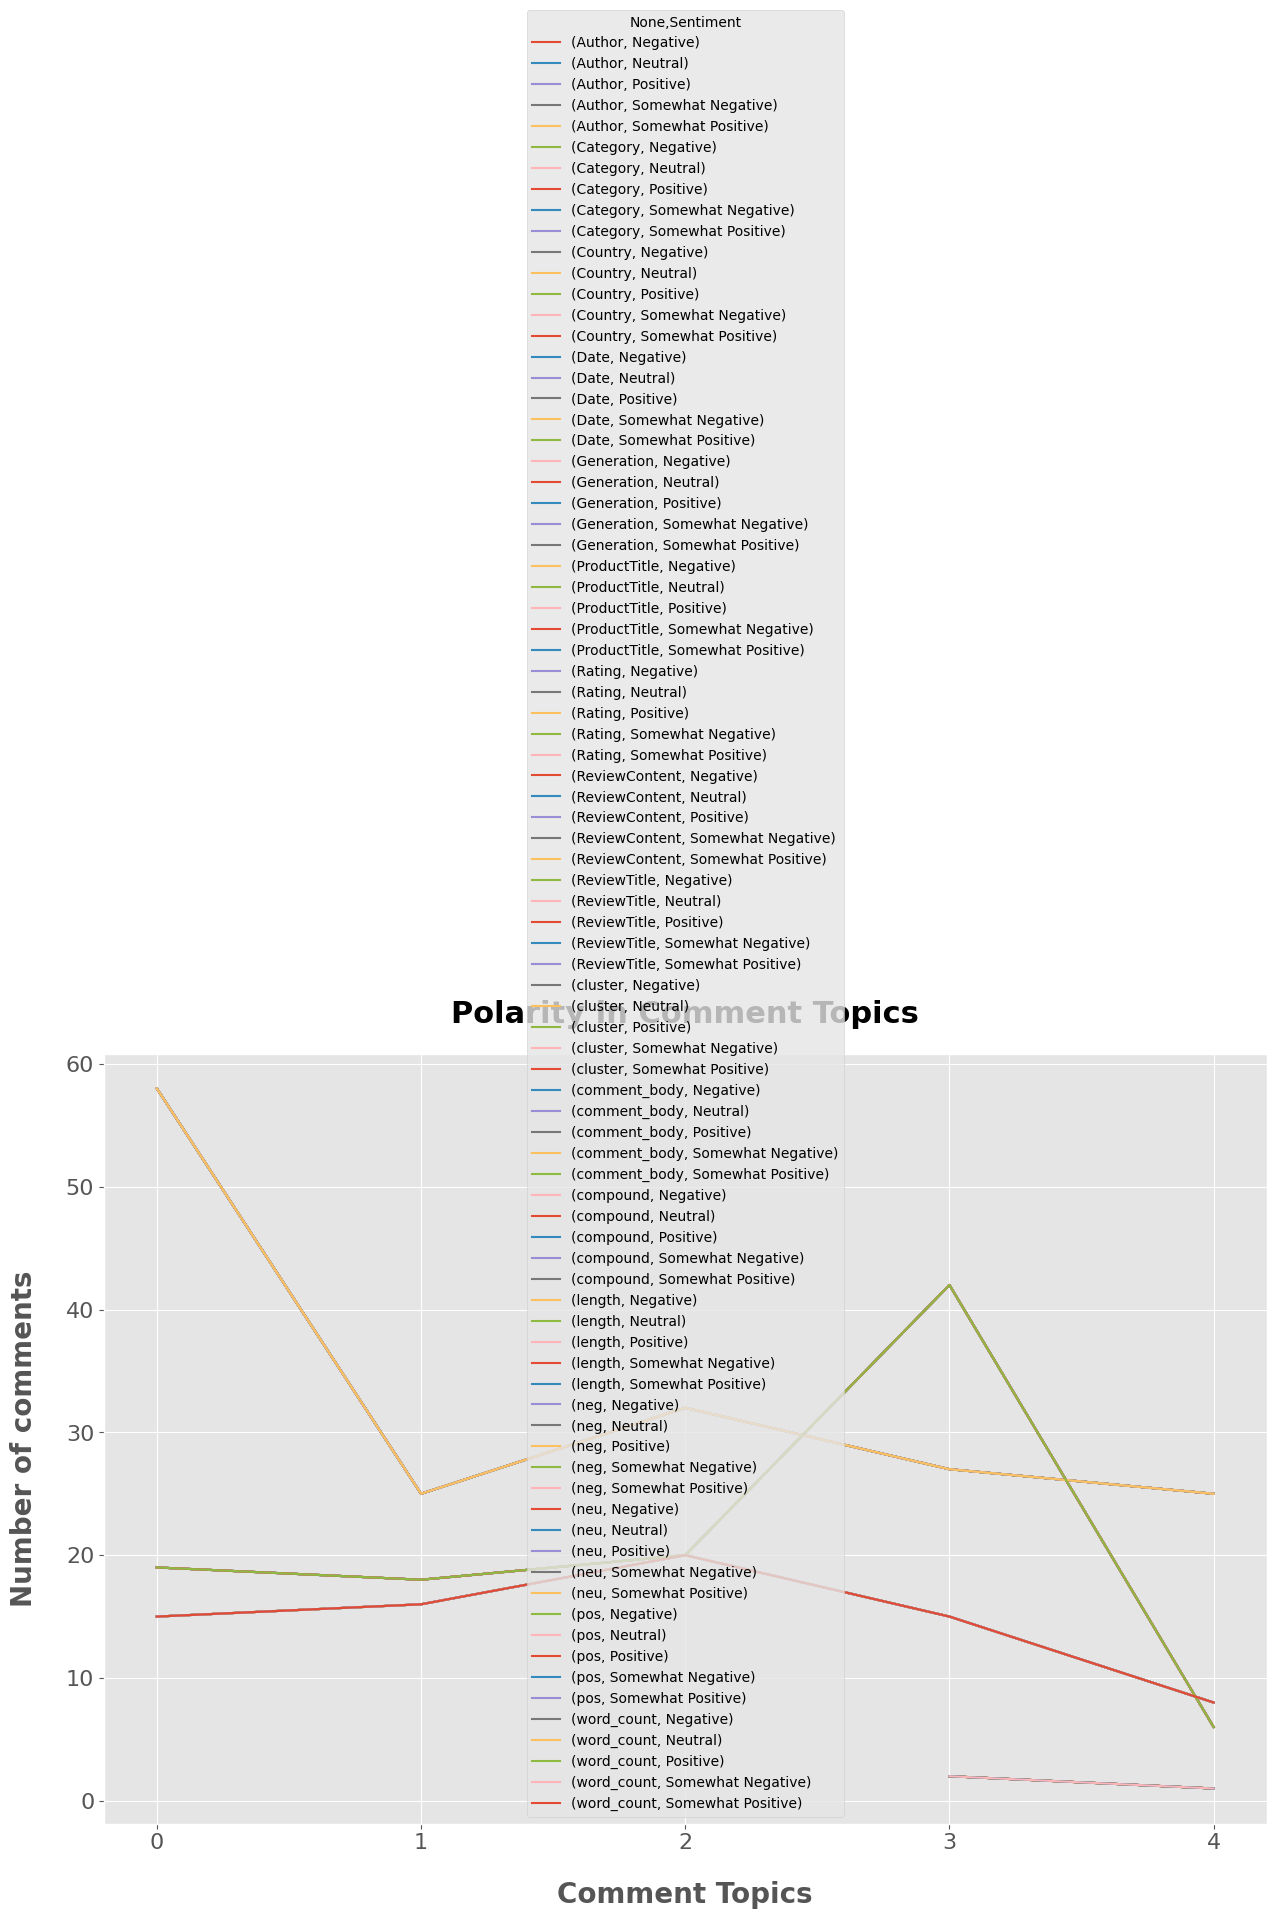

In [ ]:
ax = vis_dfS2.plot(xticks=vis_dfS2.index, ylabel="Number of comments", figsize=(15,10), fontsize=16)

ax.set_xlabel("Comment Topics", fontsize=20, fontweight="semibold", labelpad=20)
ax.set_ylabel("Number of comments", fontsize=20, fontweight="semibold", labelpad=20)
ax.set_title("Polarity in Comment Topics", fontsize=22,pad=22, fontweight="bold" )

ax.fill_between(vis_dfS2.index, vis_dfS2["Negative"], color = '#FF4A4A', alpha= 0.7)
ax.fill_between(vis_dfS2.index, vis_dfS2["Negative"], vis_dfS2["Somewhat Negative"], color = '#FF8787', alpha= 0.7)
ax.fill_between(vis_dfS2.index,vis_dfS2["Somewhat Negative"], vis_dfS2["Neutral"],color = '#FFD372' , alpha= 0.7)
ax.fill_between(vis_dfS2.index, vis_dfS2["Neutral"], vis_dfS2["Somewhat Positive"], color = '#C5D8A4', alpha= 0.7)
ax.fill_between(vis_dfS2.index,vis_dfS2["Somewhat Positive"], vis_dfS2["Positive"],color = '#829460' , alpha= 0.8)

plt.xlim(0,4)

leg = plt.legend(loc=(0.04, 0.77))
for line in leg.get_lines():
    line.set_linewidth(12)
for text in leg.get_texts():
    text.set_fontsize(18)

plt.show()